# Geopanda Assignment

#### Load python tools

In [102]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [103]:
import pandas as pd
import geopandas as gpd

In [104]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

---

#### Read GeoJSON file

In [105]:
mentalhealth_gdf = gpd.read_file(
    "data/Health_Professional_Shortage_Area_Mental_Health.geojson"
)

#### First 5 rows

In [106]:
mentalhealth_gdf.head()

,FID,OBJECTID,CNTY_FIPS,COUNTY,MSSA_ID,MSSA_NAME,NAME,HPSAID,DEFINITION,TYPE,SUBTYPE,DESIGNATIO,HPSA_DESIG,HPSA_LASTU,FTE,SCORE,HPSA_POVER,HPSA_SHORT,HPSA_DEGRE,HPSA_RATIO,HPSA_RAT_1,POP_CIV,POP,POVERTY_UN,POP100POV,POP200POV,PCT100POV,PCT200POV,UNIT_COUNT,CREATOR,CREATED,EDITOR,EDITED,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,geometry
0,1,1,007,Butte,10,Oroville/Palermo/Thermalito,Butte County,7063867880,Rural,Mental Health,Hpsa Geographic High Needs,Designated,1475539200000,1475539200000,3.70,20,21.5,10.74,0,58538:1,58538,47268,48688,47268,10289,23283,21.767369,49.257426,12,,None,,None,7.186557e+08,159552.373462,159552.373462,7.186557e+08,1.207560e+09,206854.287429,"POLYGON ((-121.49581 39.66229, -121.49518 39.6..."
1,2,2,049,Modoc,100,Adin/Lookout/Newell,Modoc County,7064264160,Frontier,Mental Health,Hpsa Geographic High Needs,Designated,1196208000000,1509148800000,0.00,17,20.9,0.60,0,,0,2214,2214,2214,447,1211,20.189702,54.697380,1,,None,,None,2.447240e+09,322875.117678,322875.117678,2.447240e+09,4.367055e+09,431655.339998,"POLYGON ((-121.25024 41.99724, -121.25013 41.9..."
2,3,3,051,Mono,102,Benton/Bridgeport/Chalfant/Crowley Lake/Colevi...,Mono County,7067685474,Frontier,Mental Health,Hpsa Geographic High Needs,Designated,1486944000000,1486944000000,0.00,17,5.0,0.00,0,,0,5918,6002,5918,390,1655,6.590064,27.965529,2,,None,,None,7.939536e+09,557830.126475,557830.126475,7.939536e+09,1.278856e+10,708135.330176,"POLYGON ((-119.52107 38.66876, -119.51158 38.6..."
3,4,4,051,Mono,103,Mammoth Lakes,Mono County,7067685474,Rural,Mental Health,Hpsa Geographic High Needs,Designated,1486944000000,1486944000000,0.00,17,5.0,0.00,0,,0,8192,8215,8192,807,3602,9.851074,43.969727,1,,None,,None,1.719323e+08,63370.354223,63370.354223,1.719323e+08,2.746502e+08,80096.819582,"POLYGON ((-118.91717 37.55034, -118.91717 37.5..."
4,5,5,053,Monterey,104,Big Sur/Lucia,MSSA 104/Big Sur/Lucia,7064465115,Frontier,Mental Health,Hpsa Geographic High Needs,Designated,1204156800000,1509148800000,0.05,13,25.0,0.04,0,26200:1,26200,1295,1303,1295,312,507,24.092664,39.150579,1,,None,,None,6.508422e+08,206605.966559,206605.966559,6.508422e+08,1.002875e+09,256407.662682,"POLYGON ((-121.82140 36.41984, -121.82115 36.4..."


#### Plot of data

<AxesSubplot:>

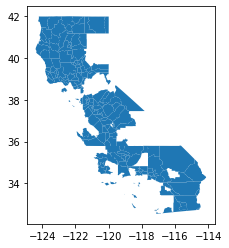

In [107]:
mentalhealth_gdf.plot()

#### Filter just the counties with percentage of more than 25% of population living below the 100% Federal poverty level

In [108]:
below_100_poverty_gdf = mentalhealth_gdf[mentalhealth_gdf["PCT100POV"] >= 25]

#### Plot the included counties from the filtered data above

<AxesSubplot:>

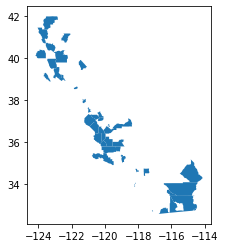

In [109]:
below_100_poverty_gdf.plot()

---

## Export geodataframe as GeoJSON

In [110]:
below_100_poverty_gdf.to_file(
    "data/counties_with_below_100_federal_poverty.geojson", driver="GeoJSON"
)